# 0 Игра в имитацию

КБ-211 Коренев Денис

Задание:

1. Дискретная случайная величина ξ принимает значения 0, 1, 2 и 3 с вероятностями соответствующими данным варианта. Используя генератор псевдослучайных чисел, получить 10000 чисел, имитирующих поведение ξ. Вывести значения частот появления значений 0, 1, 2 и 3. Проверить на уровне значимости 0,05 соответствие полученных данных распределению ξ, используя критерий сравнения долей. Вероятности: р0=i/2*(i+j+k), р1=(j+k)/2*(i+j+k), р2=(i+k)/2*(i+j+k), р3=j/2*(i+j+k). Значения i, j, k являются последними тремя цифрами зачетки. Если какая-то из этих трех цифр равна 0, то вместо 0 берется 10.
2. Непрерывная случайная величина ξ распределена по экспоненциальному закону с параметром λ соответствующим данным варианта. Построив генератор псевдослучайных чисел, получить 10000 чисел, имитирующих поведение ξ. Разбить выборку на интервалы и построить гистограмму частот. Вывести средние арифметическое значений выборки и проверить  на уровне значимости 0,05 соответствие полученных данных показательному распределению с параметром λ. Здесь λ определяется номер по списку разделить на 4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

### Входные данные

In [2]:
# Последние три цифры зачетки:
i = 3  # первая цифра
j = 9  # вторая цифра 
k = 3  # третья цифра
student_number = 11  # номер по списку

print(f"Используемые значения: i={i}, j={j}, k={k}")
print(f"Номер по списку: {student_number}")

Используемые значения: i=3, j=9, k=3
Номер по списку: 11


## Задача 1

In [3]:
print("="*50)
print("ЗАДАЧА 1")
print("="*50)

# Вероятности
denominator = 2 * (i + j + k)
p0 = i / denominator
p1 = (j + k) / denominator
p2 = (i + k) / denominator
p3 = j / denominator

print(f"Теоретические вероятности:")
print(f"p0 = {p0:.4f}")
print(f"p1 = {p1:.4f}")
print(f"p2 = {p2:.4f}")
print(f"p3 = {p3:.4f}")
print(f"Сумма вероятностей: {p0 + p1 + p2 + p3:.4f}")

# Генерируем случайные числа
np.random.seed(235)

def generate_discrete_by_simulation(n_samples, probabilities, values):
    """
    Генерация дискретных случайных величин методом имитации
    
    Алгоритм:
    1. Генерируем псевдоравномерные y1, y2, ..., yn из равномерного распределения (0,1)
    2. Разбиваем отрезок (0,1) на s частей согласно вероятностям
    3. Определяем xi по принадлежности yi к соответствующему отрезку
    """
    # Вычисляем кумулятивные вероятности (границы отрезков)
    cumulative_probs = np.cumsum(probabilities)
    
    print(f"Разбиение отрезка (0,1) на {len(values)} части:")
    print(f"  X=0: (0; {cumulative_probs[0]:.4f})")
    for i in range(1, len(cumulative_probs)):
        print(f"  X={values[i]}: ({cumulative_probs[i-1]:.4f}; {cumulative_probs[i]:.4f})")
    
    # Генерируем псевдоравномерные числа y1, y2, ..., yn
    uniform_sample = np.random.uniform(0, 1, n_samples)
    
    # Преобразуем в дискретные значения xi
    discrete_sample = np.zeros(n_samples, dtype=int)
    
    for i in range(n_samples):
        yi = uniform_sample[i]
        # Определяем, в какой отрезок попадает yi
        for j, cum_prob in enumerate(cumulative_probs):
            if yi <= cum_prob:
                discrete_sample[i] = values[j]
                break
    
    return discrete_sample, uniform_sample

# Выборка
n_samples = 10000
probabilities = [p0, p1, p2, p3]
values = [0, 1, 2, 3]
sample, uniform_values = generate_discrete_by_simulation(n_samples, probabilities, values)
# sample = np.random.choice(values, size=n_samples, p=probabilities)

# Подсчет частот
frequencies = np.bincount(sample, minlength=4)
relative_frequencies = frequencies / n_samples

print(f"\nРезультаты моделирования (n={n_samples}):")
print(f"Частоты появления:")
for i, (freq, rel_freq) in enumerate(zip(frequencies, relative_frequencies)):
    print(f"  Значение {i}: {freq} раз ({rel_freq:.4f})")

ЗАДАЧА 1
Теоретические вероятности:
p0 = 0.1000
p1 = 0.4000
p2 = 0.2000
p3 = 0.3000
Сумма вероятностей: 1.0000
Разбиение отрезка (0,1) на 4 части:
  X=0: (0; 0.1000)
  X=1: (0.1000; 0.5000)
  X=2: (0.5000; 0.7000)
  X=3: (0.7000; 1.0000)

Результаты моделирования (n=10000):
Частоты появления:
  Значение 0: 1043 раз (0.1043)
  Значение 1: 3929 раз (0.3929)
  Значение 2: 2010 раз (0.2010)
  Значение 3: 3018 раз (0.3018)


### Критерий сравнения долей

In [4]:
print("="*50)
print("КРИТЕРИЙ СРАВНЕНИЯ ДОЛЕЙ")
print("="*50)

# Проверим каждую вероятность отдельно
alpha = 0.05
KT = stats.norm.ppf(1 - alpha/2)  # KT = 1.96 для α = 0.05

print(f"Критическое значение KT = {KT:.4f}")
print(f"Уровень значимости alpha = {alpha}")
print()

for value in range(4):
    # Теоретическая доля
    p_theoretical = probabilities[value]
    
    # Выборочная доля
    p_sample = relative_frequencies[value]
    
    # Стандартная ошибка
    stderr_sample = np.sqrt(p_sample * (1 - p_sample) / n_samples)
    
    # Критерий K
    if stderr_sample > 0:
        K_stat = (p_sample - p_theoretical) / stderr_sample
    else:
        K_stat = 0
    
    # Доверительный интервал для выборочной доли
    quantile_alpha = stats.norm.ppf(1 - alpha/2)
    stderr = np.sqrt(p_sample * (1 - p_sample) / n_samples)
    DI_lower = p_sample - quantile_alpha * stderr
    DI_upper = p_sample + quantile_alpha * stderr
    
    print(f"Значение {value}:")
    print(f"  Теоретическая доля p0 = {p_theoretical:.4f}")
    print(f"  Выборочная доля p* = {p_sample:.4f}")
    print(f"  Стандартная ошибка = {stderr_sample:.6f}")
    print(f"  Статистика K = {K_stat:.4f}")
    print(f"  |K| = {abs(K_stat):.4f}")
    print(f"  {int((1-alpha)*100)}% ДИ для p*: [{DI_lower:.4f}, {DI_upper:.4f}]")
    
    # Проверка гипотезы
    if abs(K_stat) > KT:
        conclusion = f"ОТВЕРГАЕТСЯ (|K| = {abs(K_stat):.4f} > {KT:.4f})"
    else:
        conclusion = f"ПРИНИМАЕТСЯ (|K| = {abs(K_stat):.4f} ≤ {KT:.4f})"
    
    print(f"  Гипотеза H0: p = p0 {conclusion}")
    
    # Попадает ли теоретическое значение в доверительный интервал
    in_interval = DI_lower <= p_theoretical <= DI_upper
    print(f"  Теоретическое значение в ДИ: {'ДА' if in_interval else 'НЕТ'}")
    print()

КРИТЕРИЙ СРАВНЕНИЯ ДОЛЕЙ
Критическое значение KT = 1.9600
Уровень значимости alpha = 0.05

Значение 0:
  Теоретическая доля p0 = 0.1000
  Выборочная доля p* = 0.1043
  Стандартная ошибка = 0.003056
  Статистика K = 1.4068
  |K| = 1.4068
  95% ДИ для p*: [0.0983, 0.1103]
  Гипотеза H0: p = p0 ПРИНИМАЕТСЯ (|K| = 1.4068 ≤ 1.9600)
  Теоретическое значение в ДИ: ДА

Значение 1:
  Теоретическая доля p0 = 0.4000
  Выборочная доля p* = 0.3929
  Стандартная ошибка = 0.004884
  Статистика K = -1.4537
  |K| = 1.4537
  95% ДИ для p*: [0.3833, 0.4025]
  Гипотеза H0: p = p0 ПРИНИМАЕТСЯ (|K| = 1.4537 ≤ 1.9600)
  Теоретическое значение в ДИ: ДА

Значение 2:
  Теоретическая доля p0 = 0.2000
  Выборочная доля p* = 0.2010
  Стандартная ошибка = 0.004007
  Статистика K = 0.2495
  |K| = 0.2495
  95% ДИ для p*: [0.1931, 0.2089]
  Гипотеза H0: p = p0 ПРИНИМАЕТСЯ (|K| = 0.2495 ≤ 1.9600)
  Теоретическое значение в ДИ: ДА

Значение 3:
  Теоретическая доля p0 = 0.3000
  Выборочная доля p* = 0.3018
  Стандартная 

## Задача 2

ЗАДАЧА 2
Параметр λ = 2.75

Статистики выборки:
Выборочное среднее: 0.3555
Теоретическое среднее: 0.3636


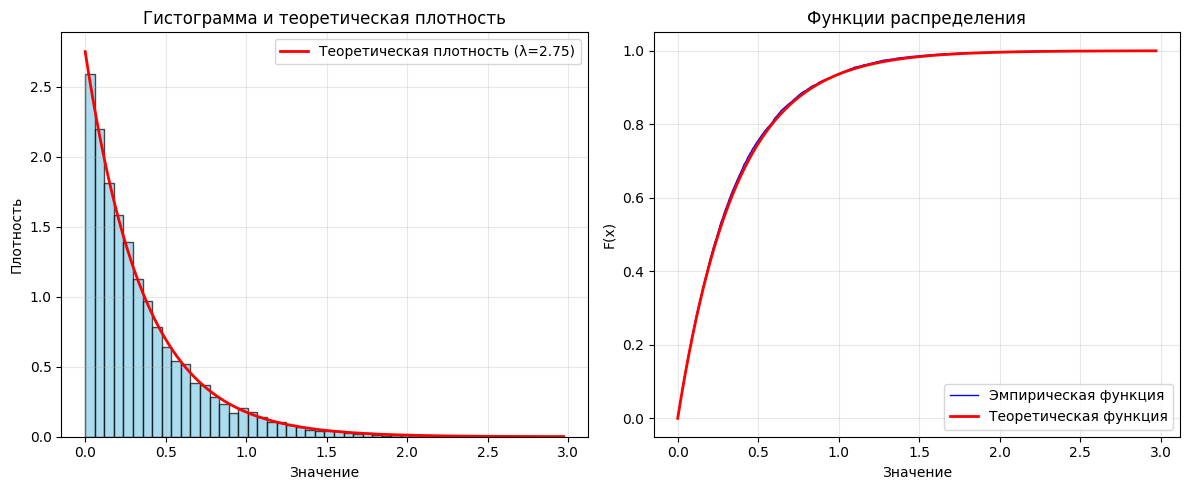

In [5]:
print("="*50)
print("ЗАДАЧА 2")
print("="*50)

# Параметр экспоненциального распределения
lambda_param = student_number / 4
print(f"Параметр λ = {lambda_param}")

# Генерация выборки из экспоненциального распределения
# Для экспоненциального распределения: F(x) = 1 - exp(-λx)
# Обратная функция: F^(-1)(u) = -ln(1-u)/λ
np.random.seed(42)
uniform_sample = np.random.uniform(0, 1, n_samples)  # Равномерная выборка [0,1]
exp_sample = -np.log(1 - uniform_sample) / lambda_param  # Преобразование в экспоненциальную

# Статистики выборки
sample_mean = np.mean(exp_sample)
theoretical_mean = 1 / lambda_param

print(f"\nСтатистики выборки:")
print(f"Выборочное среднее: {sample_mean:.4f}")
print(f"Теоретическое среднее: {theoretical_mean:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(exp_sample, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
x = np.linspace(0, np.max(exp_sample), 1000)
theoretical_pdf = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, theoretical_pdf, 'r-', linewidth=2, label=f'Теоретическая плотность (λ={lambda_param})')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title('Гистограмма и теоретическая плотность')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sorted_sample = np.sort(exp_sample)
empirical_cdf = np.arange(1, len(sorted_sample) + 1) / len(sorted_sample)
theoretical_cdf = stats.expon.cdf(sorted_sample, scale=1/lambda_param)

plt.plot(sorted_sample, empirical_cdf, 'b-', linewidth=1, label='Эмпирическая функция')
plt.plot(sorted_sample, theoretical_cdf, 'r-', linewidth=2, label='Теоретическая функция')
plt.xlabel('Значение')
plt.ylabel('F(x)')
plt.title('Функции распределения')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Критерий Колмогорова-Смирнова
Уже был тут до пары с хи-квадратом, не убирать же его

In [6]:
ks_statistic, ks_p_value = stats.kstest(exp_sample, lambda x: stats.expon.cdf(x, scale=1/lambda_param))

print(f"\nКритерий Колмогорова-Смирнова (alpha = 0.05):")
print(f"Статистика KS = {ks_statistic:.4f}")
print(f"p-value = {ks_p_value:.4f}")
print(f"Вывод: {'Гипотеза о соответствии экспоненциальному распределению принимается' if ks_p_value > 0.05 else 'Гипотеза отвергается'}")


Критерий Колмогорова-Смирнова (alpha = 0.05):
Статистика KS = 0.0125
p-value = 0.0859
Вывод: Гипотеза о соответствии экспоненциальному распределению принимается


### Критерий Хи-Квадрат

In [7]:
print(f"\n" + "="*50)
print("КРИТЕРИЙ ХИ-КВАДРАТ (χ²)")
print("="*50)

# Разбиваем выборку на интервалы
# Выбираем количество интервалов так, чтобы в каждом было не менее 5 наблюдений
num_intervals = 20
min_freq = 5 # минимальная частота в интервале

# Находим квантили для разбиения на интервалы
quantiles = np.linspace(0, 1, num_intervals + 1)
interval_bounds = stats.expon.ppf(quantiles, scale=1/lambda_param)
interval_bounds[-1] = np.inf  # последний интервал до бесконечности

# Подсчитываем наблюдаемые частоты
observed_frequencies = []
for i in range(num_intervals):
    if i == num_intervals - 1:  # последний интервал
        count = np.sum(exp_sample >= interval_bounds[i])
    else:
        count = np.sum((exp_sample >= interval_bounds[i]) & (exp_sample < interval_bounds[i+1]))
    observed_frequencies.append(count)

observed_frequencies = np.array(observed_frequencies)

# Объединяем интервалы с малыми частотами
while np.min(observed_frequencies) < min_freq and len(observed_frequencies) > 2:
    # Находим интервал с минимальной частотой
    min_idx = np.argmin(observed_frequencies)
    
    # Объединяем с соседним интервалом
    if min_idx == 0:
        # Объединяем с правым соседом
        observed_frequencies[1] += observed_frequencies[0]
        observed_frequencies = observed_frequencies[1:]
        interval_bounds = interval_bounds[1:]
    elif min_idx == len(observed_frequencies) - 1:
        # Объединяем с левым соседом
        observed_frequencies[-2] += observed_frequencies[-1]
        observed_frequencies = observed_frequencies[:-1]
        interval_bounds = interval_bounds[:-1]
    else:
        # Объединяем с тем соседом, у которого меньше частота
        if observed_frequencies[min_idx-1] <= observed_frequencies[min_idx+1]:
            # Объединяем с левым
            observed_frequencies[min_idx-1] += observed_frequencies[min_idx]
            observed_frequencies = np.delete(observed_frequencies, min_idx)
            interval_bounds = np.delete(interval_bounds, min_idx)
        else:
            # Объединяем с правым
            observed_frequencies[min_idx+1] += observed_frequencies[min_idx]
            observed_frequencies = np.delete(observed_frequencies, min_idx)
            interval_bounds = np.delete(interval_bounds, min_idx+1)

# Вычисляем теоретические частоты
s = len(observed_frequencies)  # количество интервалов после объединения
theoretical_frequencies = []

for i in range(s):
    if i == s - 1:  # последний интервал
        pi = 1 - stats.expon.cdf(interval_bounds[i], scale=1/lambda_param)
    else:
        pi = (stats.expon.cdf(interval_bounds[i+1], scale=1/lambda_param) - 
              stats.expon.cdf(interval_bounds[i], scale=1/lambda_param))
    
    ni_theoretical = n_samples * pi
    theoretical_frequencies.append(ni_theoretical)

theoretical_frequencies = np.array(theoretical_frequencies)

print(f"Количество интервалов после объединения: {s}")
print(f"Разбиение на интервалы:")
for i in range(s):
    if i == s - 1:
        interval_str = f"[{interval_bounds[i]:.3f}, +∞)"
    else:
        interval_str = f"[{interval_bounds[i]:.3f}, {interval_bounds[i+1]:.3f})"
    
    print(f"  Интервал {i+1}: {interval_str}")
    print(f"    Наблюдаемая частота ni = {observed_frequencies[i]}")
    print(f"    Теоретическая частота n'i = {theoretical_frequencies[i]:.2f}")
    print(f"    pi = {theoretical_frequencies[i]/n_samples:.4f}")

# Применяем критерий хи-квадрат
chi2_statistic, chi2_p_value = stats.chisquare(observed_frequencies, theoretical_frequencies)

# Степени свободы (s - 1 - количество оцениваемых параметров)
# Для экспоненциального распределения оцениваем 1 параметр (λ)
degrees_of_freedom = s - 1 - 1
chi2_critical = stats.chi2.ppf(1 - alpha, degrees_of_freedom)

print(f"\nРезультаты критерия χ²:")
print(f"Статистика χ² = {chi2_statistic:.4f}")
print(f"Степени свободы = {degrees_of_freedom}")
print(f"Критическое значение χ²_{degrees_of_freedom,1-alpha} = {chi2_critical:.4f}")
print(f"p-value = {chi2_p_value:.4f}")

# Вывод
if chi2_statistic > chi2_critical:
    chi2_conclusion = f"ОТВЕРГАЕТСЯ (χ² = {chi2_statistic:.4f} > {chi2_critical:.4f})"
else:
    chi2_conclusion = f"ПРИНИМАЕТСЯ (χ² = {chi2_statistic:.4f} ≤ {chi2_critical:.4f})"

print(f"Гипотеза H0: F(x) = F(x,λ) {chi2_conclusion}")


КРИТЕРИЙ ХИ-КВАДРАТ (χ²)
Количество интервалов после объединения: 20
Разбиение на интервалы:
  Интервал 1: [0.000, 0.019)
    Наблюдаемая частота ni = 493
    Теоретическая частота n'i = 500.00
    pi = 0.0500
  Интервал 2: [0.019, 0.038)
    Наблюдаемая частота ni = 538
    Теоретическая частота n'i = 500.00
    pi = 0.0500
  Интервал 3: [0.038, 0.059)
    Наблюдаемая частота ni = 503
    Теоретическая частота n'i = 500.00
    pi = 0.0500
  Интервал 4: [0.059, 0.081)
    Наблюдаемая частота ni = 509
    Теоретическая частота n'i = 500.00
    pi = 0.0500
  Интервал 5: [0.081, 0.105)
    Наблюдаемая частота ni = 504
    Теоретическая частота n'i = 500.00
    pi = 0.0500
  Интервал 6: [0.105, 0.130)
    Наблюдаемая частота ni = 506
    Теоретическая частота n'i = 500.00
    pi = 0.0500
  Интервал 7: [0.130, 0.157)
    Наблюдаемая частота ni = 502
    Теоретическая частота n'i = 500.00
    pi = 0.0500
  Интервал 8: [0.157, 0.186)
    Наблюдаемая частота ni = 503
    Теоретическая частота